In [ ]:
!pip install fredapi
!pip install yfinance


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 79.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 27.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138905 sha256=39a9af79a39f10c74194ce131093b0fa9941bec4dcec802dde451bf859c6e42b
  Stored in directory: /root/.cache/pip/wheels/fb/8f/48/21f2805b10ea9f7bba0d72f4a4b353045f50d91cbc7cce1b99
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation

In [ ]:
import pandas as pd
from fredapi import Fred
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Retreiving

## i. Enter the needed quotes

In [ ]:
fred_data = {
    'GDP': 'GDP',
    'CPI': 'CPIAUCSL',
}

fred = Fred(api_key='cbd136333ef1cd65783ab04229be84c1')

tickers = {
    'NYSE': '^NYA',
    'Tokyo Stock Exchange': '^N225',
    'Euronext 100': '^N100',
    'Toronto Stock Exchange': '^GSPTSE',
    'Korea Exchange': '^KS11',
    'Shanghai Stock Exchange': '000001.SS',
    'NSE of India': '^NSEI',
    'Saudi Stock Exchange': '^TASI.SR',
    'Johannesburg Stock Exchange': 'JSE.JO',
    'Brazil Stock Exchange': '^BVSP'
}

## ii. Retrieve Economic Parameters

In [ ]:
data = {}
for name, series_id in fred_data.items():
    data[name] = fred.get_series(series_id)

economic_df = pd.DataFrame(data)
economic_df.index.name = 'Date'  # Set index name to 'Date'
economic_df.reset_index(inplace=True)  # Reset index to create 'Date' column

economic_df = economic_df[(economic_df['Date'] >= '1990-01-01') & (economic_df['Date'] != '2024-10-11')]  # Filter date from 1990 and exclude September 2024

economic_df

,Date,GDP,CPI
520,1990-01-01,5872.701,127.500
521,1990-02-01,NaN,128.000
522,1990-03-01,NaN,128.600
523,1990-04-01,5960.028,128.900
524,1990-05-01,NaN,129.100
...,...,...,...
932,2024-05-01,NaN,313.225
933,2024-06-01,NaN,313.049
934,2024-07-01,NaN,313.534
935,2024-08-01,NaN,314.121


## iii. Retrieve Stock Data

In [ ]:
stock_data_list = []
for name, ticker in tickers.items():
    data = yf.download(ticker, start='1990-01-01', end='2024-10-11', interval='1d')
    data['Index'] = name
    data = data.ffill()
    stock_data_list.append(data.reset_index())

stock_data_df = pd.concat(stock_data_list, ignore_index=True)

stock_data_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Index
0,1990-01-02,2093.600098,2093.600098,2093.600098,2093.600098,2093.600098,0,NYSE
1,1990-01-03,2091.479980,2091.479980,2091.479980,2091.479980,2091.479980,0,NYSE
2,1990-01-04,2075.520020,2075.520020,2075.520020,2075.520020,2075.520020,0,NYSE
3,1990-01-05,2058.070068,2058.070068,2058.070068,2058.070068,2058.070068,0,NYSE
4,1990-01-08,2065.370117,2065.370117,2065.370117,2065.370117,2065.370117,0,NYSE
...,...,...,...,...,...,...,...,...
68046,2024-10-04,131672.000000,131936.000000,131156.000000,131792.000000,131792.000000,7054700,Brazil Stock Exchange
68047,2024-10-07,131792.000000,132943.000000,131676.000000,132018.000000,132018.000000,7702100,Brazil Stock Exchange
68048,2024-10-08,132016.000000,132016.000000,130371.000000,131512.000000,131512.000000,9093200,Brazil Stock Exchange
68049,2024-10-09,131510.000000,131520.000000,129719.000000,129962.000000,129962.000000,9220400,Brazil Stock Exchange


# 2. Data Cleaning

## i. Extract only the "Close" prices for each index.


In [ ]:
pivoted_stock_filtered = stock_data_df.pivot(index='Date', columns='Index', values='Close')

pivoted_stock_filtered = pivoted_stock_filtered.reset_index()

column_order_filtered = ['Date'] + list(tickers.keys())

pivoted_stock_filtered = pivoted_stock_filtered[column_order_filtered]

pivoted_stock_filtered

Index,Date,NYSE,Tokyo Stock Exchange,Euronext 100,Toronto Stock Exchange,Korea Exchange,Shanghai Stock Exchange,NSE of India,Saudi Stock Exchange,Johannesburg Stock Exchange,Brazil Stock Exchange
0,1990-01-02,2093.600098,NaN,NaN,4004.399902,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,2091.479980,NaN,NaN,4009.500000,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-04,2075.520020,38712.878906,NaN,4000.899902,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-05,2058.070068,38274.761719,NaN,3990.399902,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-08,2065.370117,38294.960938,NaN,3971.100098,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9350,2024-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11769.040039,NaN,NaN
9351,2024-10-07,19432.300781,39332.738281,1484.969971,24102.699219,2610.379883,NaN,24795.750000,11913.620117,12500.0,132018.0
9352,2024-10-08,19435.029297,38937.539062,1478.510010,24072.500000,2594.360107,3489.774902,25013.150391,12027.169922,12500.0,131512.0
9353,2024-10-09,19547.089844,39277.960938,1487.589966,24224.900391,NaN,3258.857910,24981.949219,11927.330078,12396.0,129962.0


## ii. Forward Fill missing values in the daily prices data

In [ ]:
pivoted_stock_filtered = pivoted_stock_filtered.ffill()
pivoted_stock_filtered

Index,Date,NYSE,Tokyo Stock Exchange,Euronext 100,Toronto Stock Exchange,Korea Exchange,Shanghai Stock Exchange,NSE of India,Saudi Stock Exchange,Johannesburg Stock Exchange,Brazil Stock Exchange
0,1990-01-02,2093.600098,NaN,NaN,4004.399902,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,2091.479980,NaN,NaN,4009.500000,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-04,2075.520020,38712.878906,NaN,4000.899902,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-05,2058.070068,38274.761719,NaN,3990.399902,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-08,2065.370117,38294.960938,NaN,3971.100098,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9350,2024-10-06,19538.679688,38635.621094,1483.459961,24162.800781,2569.709961,3336.497070,25014.599609,11769.040039,12580.0,131792.0
9351,2024-10-07,19432.300781,39332.738281,1484.969971,24102.699219,2610.379883,3336.497070,24795.750000,11913.620117,12500.0,132018.0
9352,2024-10-08,19435.029297,38937.539062,1478.510010,24072.500000,2594.360107,3489.774902,25013.150391,12027.169922,12500.0,131512.0
9353,2024-10-09,19547.089844,39277.960938,1487.589966,24224.900391,2594.360107,3258.857910,24981.949219,11927.330078,12396.0,129962.0


# 3. Merge the Data (by Date)

In [ ]:
pivoted_stock_filtered['Date'] = pd.to_datetime(pivoted_stock_filtered['Date'])
economic_df['Date'] = pd.to_datetime(economic_df['Date'])

pivoted_stock_date = pivoted_stock_filtered.set_index('Date')
economic_df_date = economic_df.set_index('Date')

pivoted_stock_resampled = pivoted_stock_date.reindex(economic_df_date.index, method='ffill')

pivoted_stock_resampled_reset = pivoted_stock_resampled.reset_index()
economic_df_reset = economic_df_date.reset_index()

merged_df = pd.merge(pivoted_stock_resampled_reset, economic_df_reset, on='Date', how='left')

merged_df.to_csv('merged_df.csv')

merged_df

,Date,NYSE,Tokyo Stock Exchange,Euronext 100,Toronto Stock Exchange,Korea Exchange,Shanghai Stock Exchange,NSE of India,Saudi Stock Exchange,Johannesburg Stock Exchange,Brazil Stock Exchange,GDP,CPI
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5872.701,127.500
1,1990-02-01,1919.339966,37206.421875,NaN,3709.100098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.000
2,1990-03-01,1940.489990,33829.578125,NaN,3700.199951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.600
3,1990-04-01,1975.699951,29980.449219,NaN,3639.500000,NaN,NaN,NaN,NaN,NaN,NaN,5960.028,128.900
4,1990-05-01,1926.750000,29689.830078,NaN,3334.100098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2024-05-01,17576.390625,38274.050781,1503.609985,21728.599609,2692.060059,3104.824951,22604.849609,12345.650391,8594.0,125924.0,NaN,313.225
413,2024-06-01,18083.689453,38487.898438,1530.660034,22269.099609,2636.520020,3086.812988,22530.699219,11503.490234,9204.0,122098.0,NaN,313.049
414,2024-07-01,17957.050781,39631.058594,1496.859985,21875.800781,2804.310059,2994.729980,24141.949219,11658.530273,10780.0,124718.0,NaN,313.534
415,2024-08-01,18493.230469,38126.328125,1463.530029,22723.199219,2777.679932,2932.386963,25010.900391,12045.780273,10720.0,127395.0,NaN,314.121


In [ ]:
# Create a copy of merged_df
merged_df_gdp = merged_df.copy()

# Remove rows with any NaN values in merged_df_gdp and drop the 'CPI' column
merged_df_gdp = merged_df_gdp.dropna(axis=0).drop(columns=['CPI'])

# Display the resulting DataFrame
merged_df_gdp

,Date,NYSE,Tokyo Stock Exchange,Euronext 100,Toronto Stock Exchange,Korea Exchange,Shanghai Stock Exchange,NSE of India,Saudi Stock Exchange,Johannesburg Stock Exchange,Brazil Stock Exchange,GDP
213,2007-10-01,10184.500000,16845.960938,1024.380005,14200.599609,1962.670044,5552.300781,5068.950195,7819.149902,8000.0,62340.0,14715.058
216,2008-01-01,9740.320312,15307.780273,995.229980,13833.099609,1897.130005,5261.562988,6144.350098,10717.889648,8700.0,63886.0,14706.538
219,2008-04-01,9088.490234,12656.419922,860.609985,13440.700195,1702.250000,3329.162109,4739.549805,8980.549805,6500.0,62775.0,14865.701
222,2008-07-01,8641.280273,13463.200195,765.580017,14467.000000,1666.459961,2651.604980,3896.750000,9385.190430,5400.0,63396.0,14898.999
225,2008-10-01,7519.950195,11368.259766,695.119995,11714.500000,1439.670044,2293.783936,3950.750000,7133.470215,5600.0,49799.0,14608.209
...,...,...,...,...,...,...,...,...,...,...,...,...
399,2023-04-01,15374.910156,28041.480469,1360.260010,20099.900391,2476.860107,3272.860107,17359.750000,10590.099609,9796.0,101882.0,27453.815
402,2023-07-01,15875.910156,33189.039062,1373.750000,20155.300781,2564.280029,3202.060059,19189.050781,11458.980469,9100.0,118087.0,27967.697
405,2023-10-01,15398.209961,31857.619141,1323.709961,19541.300781,2465.070068,3110.475098,19638.300781,11040.169922,9228.0,116565.0,28296.967
408,2024-01-01,16852.890625,33464.171875,1395.520020,20958.400391,2655.280029,2974.935059,21741.900391,11967.389648,9244.0,134185.0,28624.069


In [ ]:
# Create a copy of merged_df
merged_df_cpi = merged_df.copy()

# Drop the 'GDP' column first, then remove rows with any NaN values
merged_df_cpi = merged_df_cpi.drop(columns=['GDP']).dropna(axis=0)

# Display the resulting DataFrame
merged_df_cpi

,Date,NYSE,Tokyo Stock Exchange,Euronext 100,Toronto Stock Exchange,Korea Exchange,Shanghai Stock Exchange,NSE of India,Saudi Stock Exchange,Johannesburg Stock Exchange,Brazil Stock Exchange,CPI
213,2007-10-01,10184.500000,16845.960938,1024.380005,14200.599609,1962.670044,5552.300781,5068.950195,7819.149902,8000.0,62340.0,209.190
214,2007-11-01,10022.080078,16870.400391,1027.410034,14372.500000,2063.139893,5914.285156,5866.450195,8478.990234,8670.0,64050.0,210.834
215,2007-12-01,9856.849609,15680.669922,1000.570007,13689.099609,1906.000000,4871.777832,5762.750000,9389.709961,9200.0,63006.0,211.445
216,2008-01-01,9740.320312,15307.780273,995.229980,13833.099609,1897.130005,5261.562988,6144.350098,10717.889648,8700.0,63886.0,212.174
217,2008-02-01,9277.580078,13497.160156,882.099976,13318.400391,1634.530029,4320.767090,5317.250000,9559.870117,6999.0,61080.0,212.687
...,...,...,...,...,...,...,...,...,...,...,...,...
412,2024-05-01,17576.390625,38274.050781,1503.609985,21728.599609,2692.060059,3104.824951,22604.849609,12345.650391,8594.0,125924.0,313.225
413,2024-06-01,18083.689453,38487.898438,1530.660034,22269.099609,2636.520020,3086.812988,22530.699219,11503.490234,9204.0,122098.0,313.049
414,2024-07-01,17957.050781,39631.058594,1496.859985,21875.800781,2804.310059,2994.729980,24141.949219,11658.530273,10780.0,124718.0,313.534
415,2024-08-01,18493.230469,38126.328125,1463.530029,22723.199219,2777.679932,2932.386963,25010.900391,12045.780273,10720.0,127395.0,314.121


# 4. Data Visualization

## i. GDP and CCI Over Time

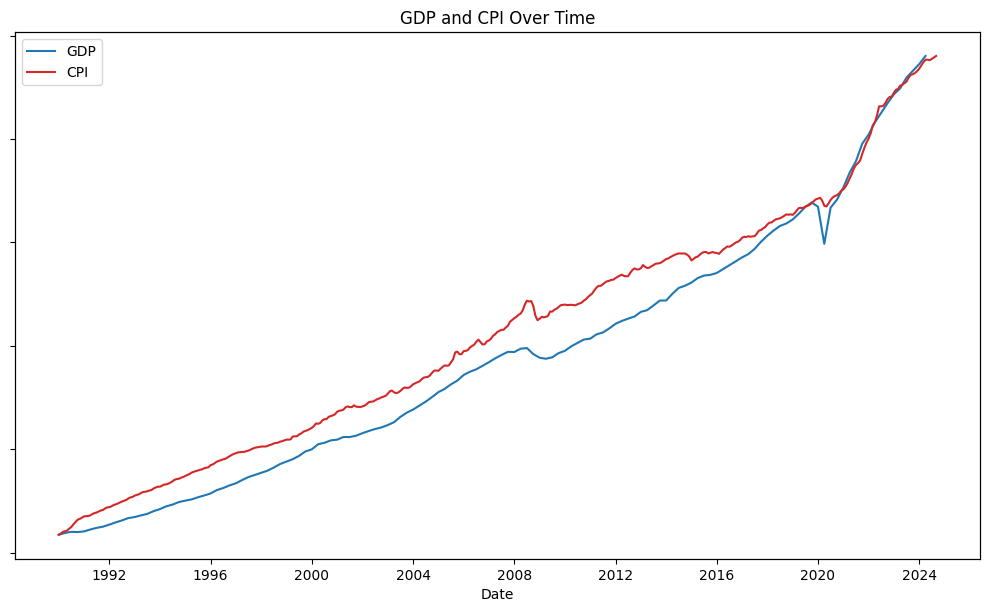

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')

# Filter out the GDP data to plot quarterly
quarterly_gdp = merged_df.dropna(subset=['GDP'])

# Plot quarterly GDP
line1, = ax1.plot(quarterly_gdp['Date'], quarterly_gdp['GDP'], color='tab:blue', label='GDP')
ax1.tick_params(axis='y', which='both', left=False, labelleft=False)
ax1.grid(False)
ax2 = ax1.twinx()
line2, = ax2.plot(merged_df['Date'], merged_df['CPI'], color='tab:red', label='CPI')
ax2.tick_params(axis='y', which='both', left=False, labelleft=False, right=False, labelright=False)
ax2.grid(False)

# Adding a legend for the colors
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

# Title and layout adjustments
fig.tight_layout()
plt.title('GDP and CPI Over Time')
plt.show()

## ii. Stock Index Prices Over Time

In [ ]:
index_columns = ['NYSE', 'Tokyo Stock Exchange', 'Euronext 100', 'Toronto Stock Exchange',
                 'Korea Exchange', 'Shanghai Stock Exchange', 'NSE of India',
                 'Saudi Stock Exchange', 'Johannesburg Stock Exchange', 'Brazil Stock Exchange']

metrics_column = ['GDP', 'CPI']

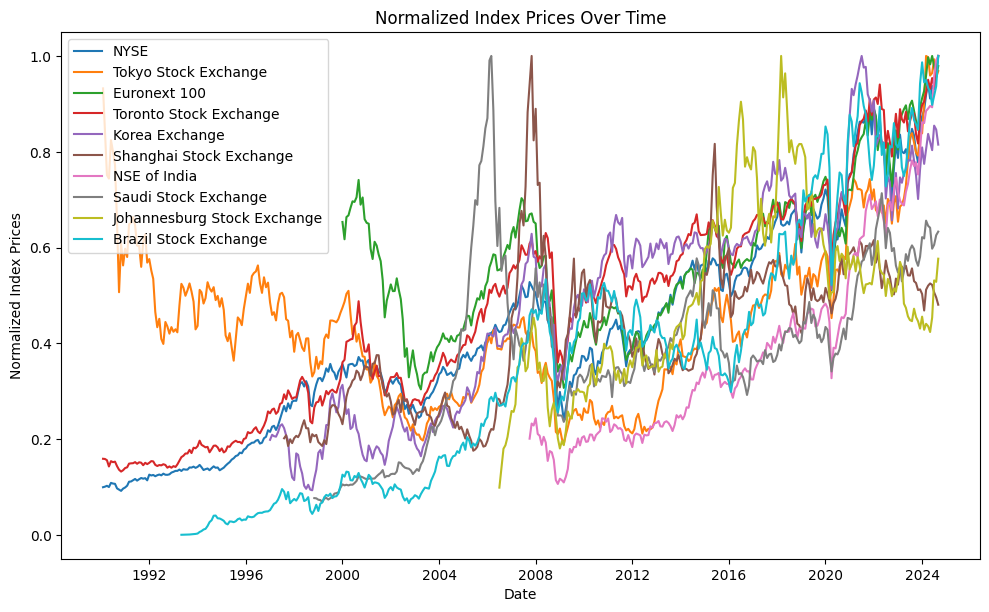

In [ ]:
normalized_index = merged_df[index_columns].apply(lambda x: x / x.max())

fig, ax = plt.subplots(figsize=(10, 6))

for index in index_columns:
    ax.plot(merged_df['Date'], normalized_index[index], label=index)

ax.set_xlabel('Date')
ax.set_ylabel('Normalized Index Prices')
plt.legend(loc='upper left')

fig.tight_layout()
plt.title('Normalized Index Prices Over Time')

plt.show()

# 5. Correlation

## i. Regular Correlation

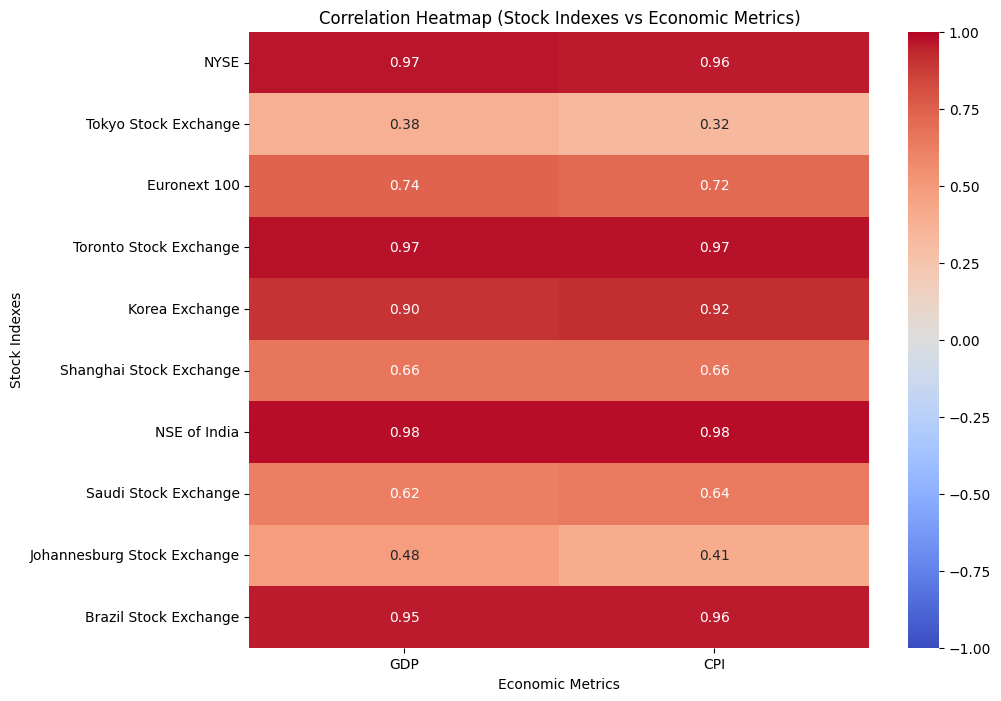

In [ ]:
correlation_matrix = merged_df.corr()

correlation_subset = correlation_matrix.loc[index_columns, metrics_column]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Stock Indexes vs Economic Metrics)')
plt.xlabel('Economic Metrics')
plt.ylabel('Stock Indexes')
plt.show()

In [ ]:
correlation_subset

,GDP,CPI
NYSE,0.966799,0.957729
Tokyo Stock Exchange,0.377072,0.321995
Euronext 100,0.740173,0.716124
Toronto Stock Exchange,0.970629,0.974307
Korea Exchange,0.904117,0.920749
Shanghai Stock Exchange,0.656782,0.657332
NSE of India,0.983165,0.976808
Saudi Stock Exchange,0.618332,0.644113
Johannesburg Stock Exchange,0.479427,0.405823
Brazil Stock Exchange,0.954186,0.956883


The heatmap shows that the NYSE, Toronto Stock Exchange, and NSE of India have strong positive correlations with U.S. economic metrics like GDP and CPI, indicating these exchanges are more influenced by these factors. In contrast, the Unemployment Rate (UNRATE) and Consumer Confidence Index (CCI) tend to have negative correlations with most stock indexes. Notably, Tokyo Stock Exchange has weaker correlations across the board, while Johannesburg Stock Exchange and Saudi Stock Exchange display mixed correlations with U.S. economic metrics.

## ii. Periods correlation

### a. 3 years

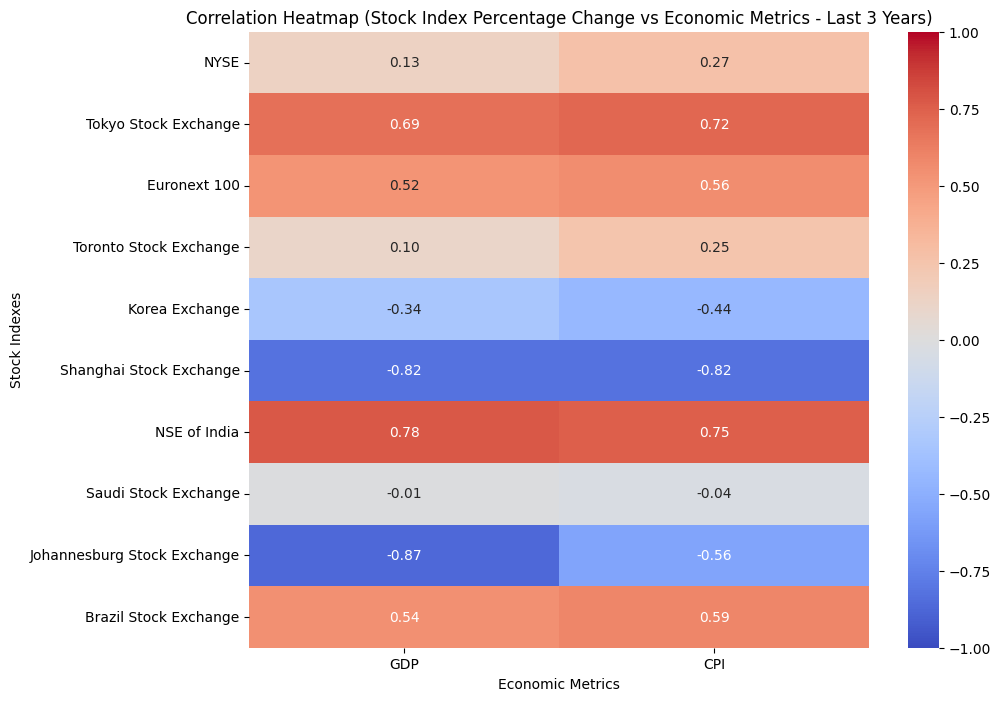

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

latest_date = merged_df['Date'].max()
three_years_ago = latest_date - pd.DateOffset(years=3)
filtered_data = merged_df[merged_df['Date'] >= three_years_ago]

indexes_and_metrics = index_columns + metrics_column
data_subset = filtered_data[indexes_and_metrics]

correlation_matrix_last_3_years = data_subset.corr()

correlation_subset_last_3_years = correlation_matrix_last_3_years.loc[index_columns, metrics_column]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset_last_3_years, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Stock Index Percentage Change vs Economic Metrics - Last 3 Years)')
plt.xlabel('Economic Metrics')
plt.ylabel('Stock Indexes')
plt.show()

### b. 10 years

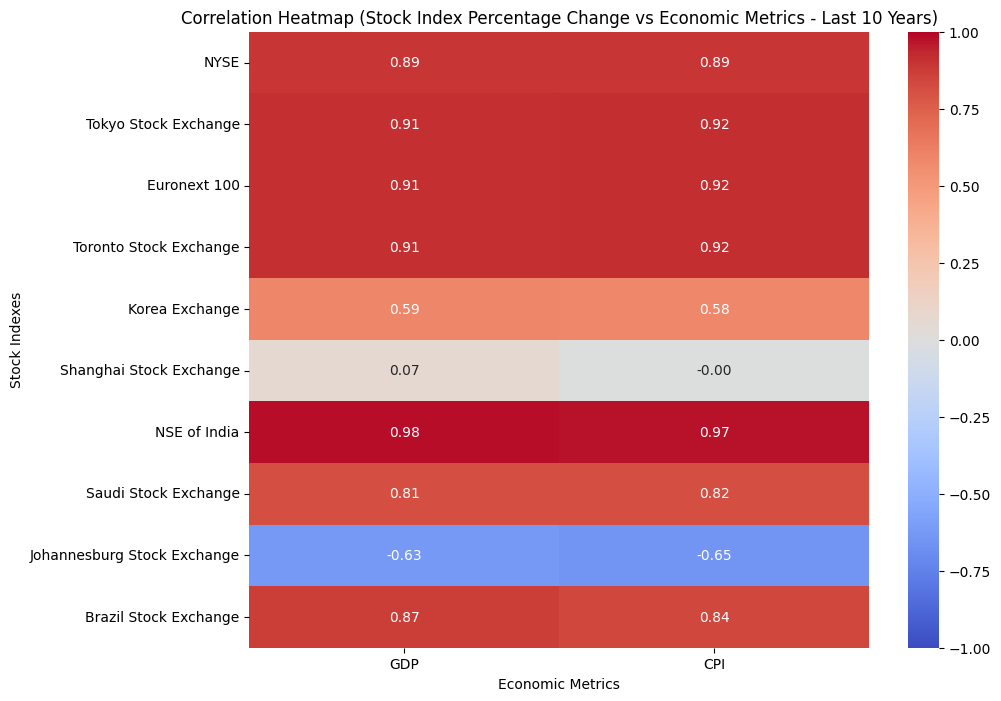

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

latest_date = merged_df['Date'].max()
ten_years_ago = latest_date - pd.DateOffset(years=10)
filtered_data = merged_df[merged_df['Date'] >= ten_years_ago]

indexes_and_metrics = index_columns + metrics_column
data_subset = filtered_data[indexes_and_metrics]

correlation_matrix_last_10_years = data_subset.corr()

correlation_subset_last_10_years = correlation_matrix_last_10_years.loc[index_columns, metrics_column]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset_last_10_years, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Stock Index Percentage Change vs Economic Metrics - Last 10 Years)')
plt.xlabel('Economic Metrics')
plt.ylabel('Stock Indexes')
plt.show()

### c. 20 years

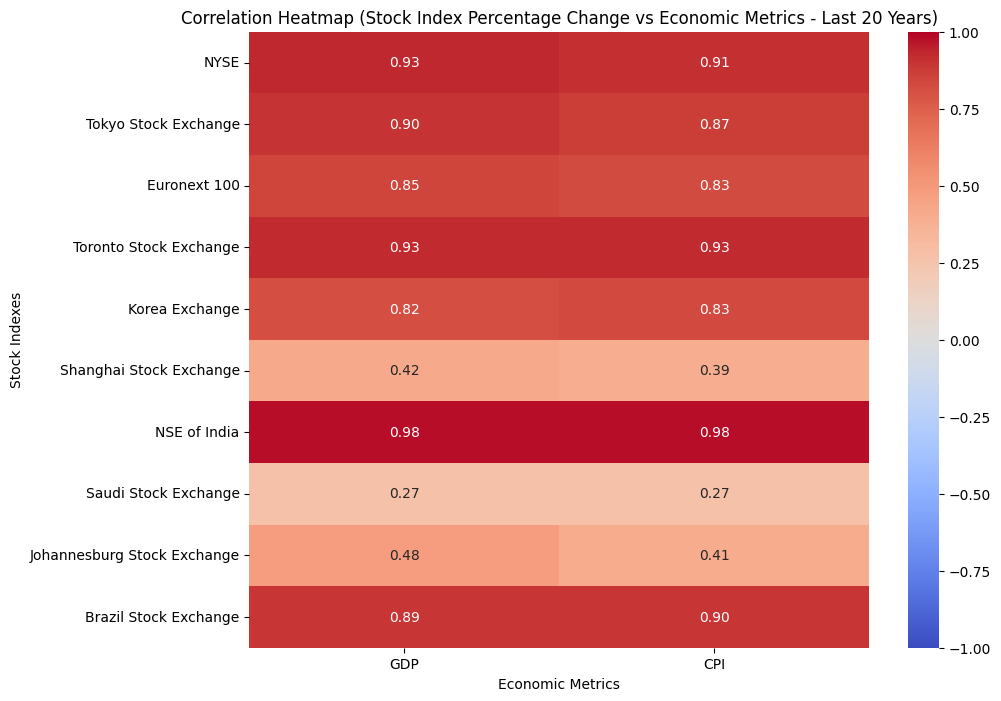

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

latest_date = merged_df['Date'].max()
twenty_years_ago = latest_date - pd.DateOffset(years=20)
filtered_data = merged_df[merged_df['Date'] >= twenty_years_ago]

indexes_and_metrics = index_columns + metrics_column
data_subset = filtered_data[indexes_and_metrics]

correlation_matrix_last_20_years = data_subset.corr()

correlation_subset_last_20_years = correlation_matrix_last_20_years.loc[index_columns, metrics_column]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset_last_20_years, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Stock Index Percentage Change vs Economic Metrics - Last 20 Years)')
plt.xlabel('Economic Metrics')
plt.ylabel('Stock Indexes')
plt.show()

### d. Visualization Check

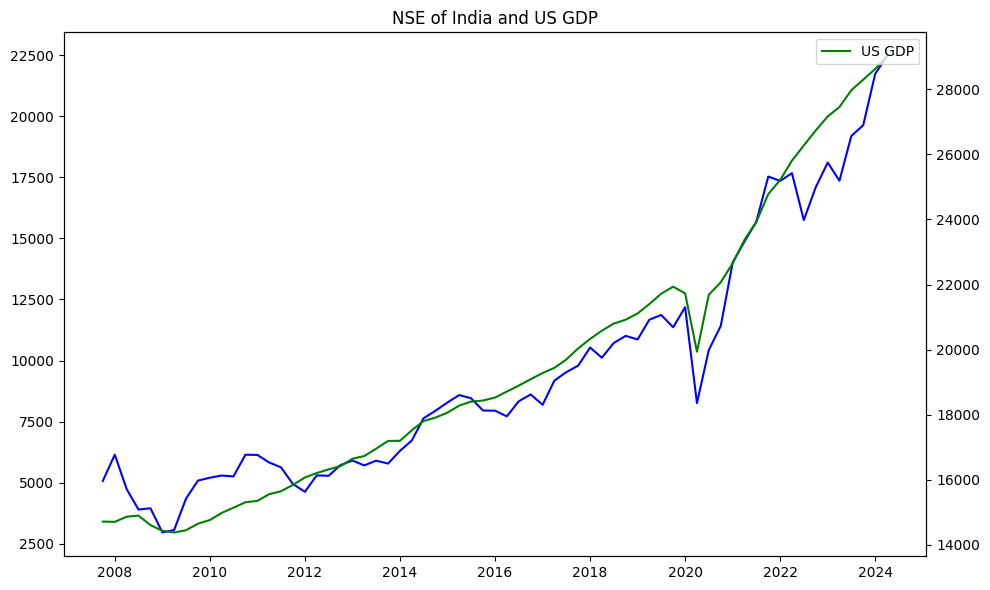

In [ ]:
nse_gdp = merged_df[['Date', 'NSE of India', 'GDP']].dropna()

plt.figure(figsize=(10, 6))

plt.plot(nse_gdp['Date'], nse_gdp['NSE of India'], label='NSE of India', color='blue')

ax2 = plt.twinx()
ax2.plot(nse_gdp['Date'], nse_gdp['GDP'], label='US GDP', color='green')

plt.title('NSE of India and US GDP')
plt.xlabel('Date')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.grid(False)
plt.show()

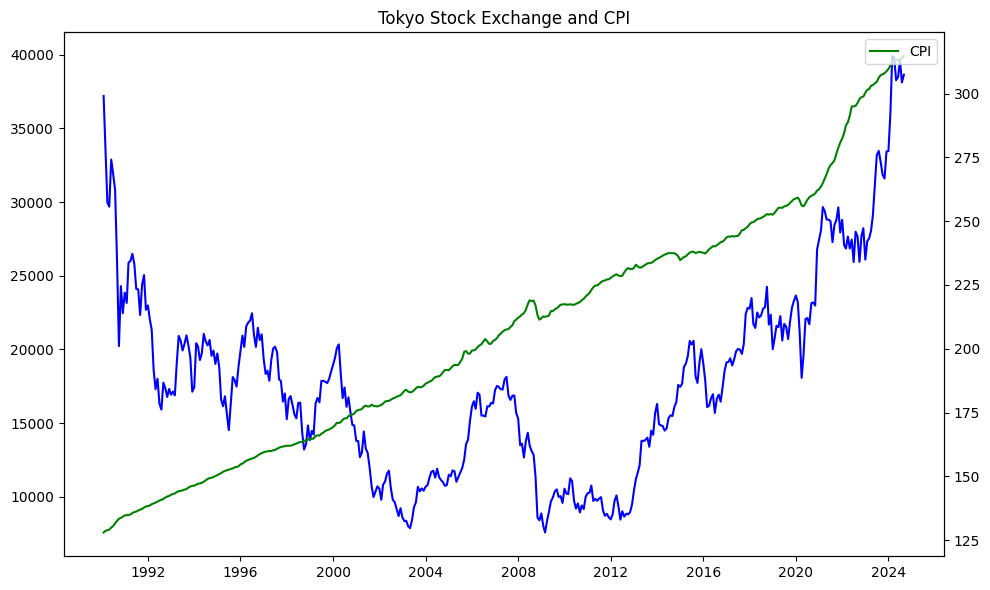

In [ ]:
tokyo_cpi = merged_df[['Date', 'Tokyo Stock Exchange', 'CPI']].dropna()
tokyo_cpi['Date'] = pd.to_datetime(tokyo_cpi['Date'])

# Plotting all available data
plt.figure(figsize=(10, 6))

plt.plot(tokyo_cpi['Date'], tokyo_cpi['Tokyo Stock Exchange'], label='Tokyo Stock Exchange', color='blue')
ax2 = plt.twinx()
ax2.plot(tokyo_cpi['Date'], tokyo_cpi['CPI'], label='CPI', color='green')

plt.title('Tokyo Stock Exchange and CPI')
plt.xlabel('Date')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.grid(False)
plt.show()

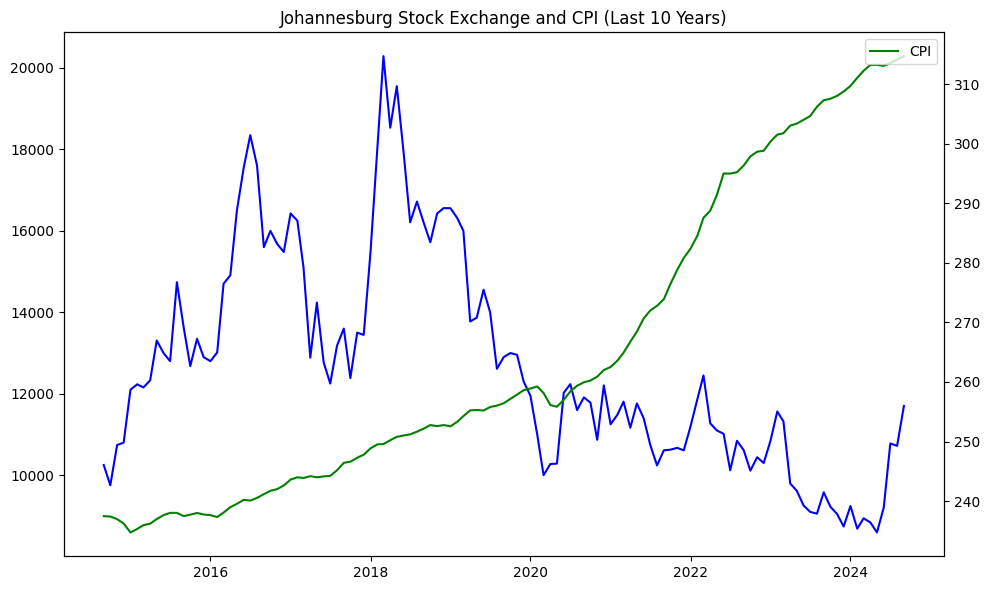

In [ ]:
#Show the visualization of Johannesburg Stock Exchange and CPI (last 10 years)

jse_cpi['Date'] = pd.to_datetime(jse_cpi['Date'])

# Get the last date in the dataframe and calculate the date 10 years before
latest_date = jse_cpi['Date'].max()
start_date = latest_date - pd.DateOffset(years=10)

# Filter the dataframe to include only the last 10 years
jse_cpi_last_10_years = jse_cpi[jse_cpi['Date'] >= start_date]

# Plotting the filtered data
plt.figure(figsize=(10, 6))

plt.plot(jse_cpi_last_10_years['Date'], jse_cpi_last_10_years['Johannesburg Stock Exchange'], label='Johannesburg Stock Exchange', color='blue')
ax2 = plt.twinx()
ax2.plot(jse_cpi_last_10_years['Date'], jse_cpi_last_10_years['CPI'], label='CPI', color='green')

plt.title('Johannesburg Stock Exchange and CPI (Last 10 Years)')
plt.xlabel('Date')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.grid(False)
plt.show()

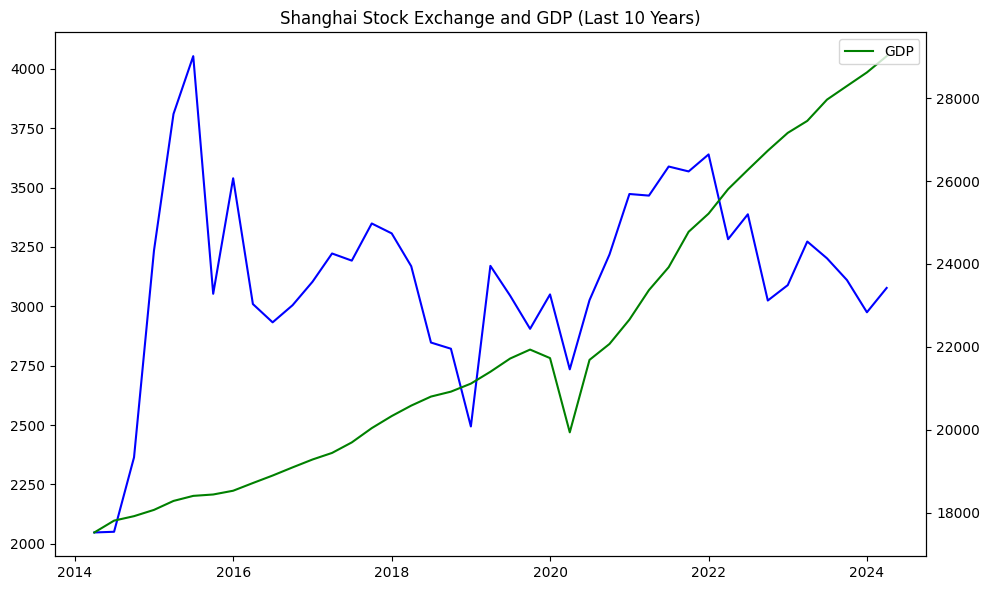

In [ ]:
shanghai_gdp = merged_df[['Date', 'Shanghai Stock Exchange', 'GDP']].dropna()
shanghai_gdp['Date'] = pd.to_datetime(shanghai_gdp['Date'])

# Get the last date in the dataframe and calculate the date 10 years before
latest_date = shanghai_gdp['Date'].max()
start_date = latest_date - pd.DateOffset(years=10)

# Filter the dataframe to include only the last 10 years
shanghai_gdp_last_10_years = shanghai_gdp[shanghai_gdp['Date'] >= start_date]

# Plotting the filtered data
plt.figure(figsize=(10, 6))

plt.plot(shanghai_gdp_last_10_years['Date'], shanghai_gdp_last_10_years['Shanghai Stock Exchange'], label='Shanghai Stock Exchange', color='blue')
ax2 = plt.twinx()
ax2.plot(shanghai_gdp_last_10_years['Date'], shanghai_gdp_last_10_years['GDP'], label='GDP', color='green')

plt.title('Shanghai Stock Exchange and GDP (Last 10 Years)')
plt.xlabel('Date')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.grid(False)
plt.show()

# 6. HYPOTHESIS #1

## HYPOTHESIS: The NYSE (U.S Stock Exchange) have a stronger correlation or more sensitive to the GDP than the International exchanges

Null Hypothesis (H0): The correlation of NYSE with the GDP is not stronger or the same with the International exchanges with the US GDP. Alternative Hypothesis (H1): The NYSE have stronger correlation with the US GDP than the International exchanges with the US GDP

In [ ]:
# Calculate the mean correlation of international stock exchanges with GDP
international_indexes = ['Tokyo Stock Exchange', 'Euronext 100', 'Toronto Stock Exchange',
                         'Korea Exchange', 'Shanghai Stock Exchange', 'NSE of India',
                         'Saudi Stock Exchange', 'Johannesburg Stock Exchange', 'Brazil Stock Exchange']

mean_international = correlation_subset.loc[international_indexes, 'GDP'].mean()

# Get the NYSE correlation with GDP
nyse_gdp_correlation = correlation_subset.loc['NYSE', 'GDP']

mean_international, nyse_gdp_correlation

(0.742653733621239, 0.966799283861923)

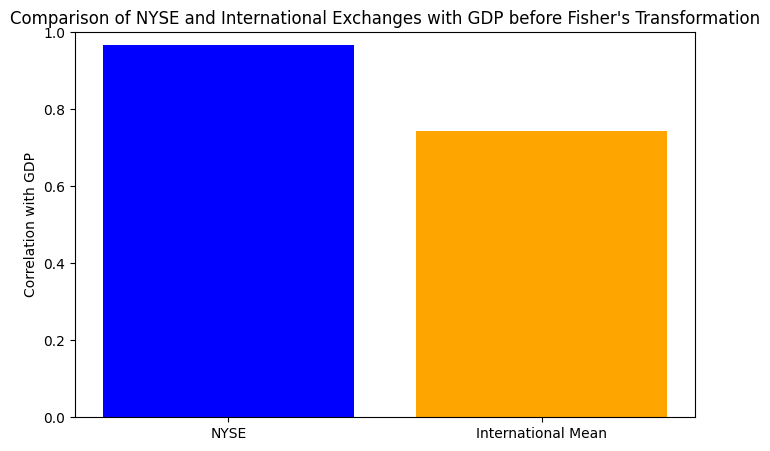

In [ ]:
plt.figure(figsize=(8, 5))

# Bar plot for NYSE and International mean correlation with GDP
plt.bar(['NYSE', 'International Mean'], [nyse_gdp_correlation, mean_international], color=['blue', 'orange'])

plt.ylabel('Correlation with GDP')
plt.title("Comparison of NYSE and International Exchanges with GDP before Fisher's Transformation")
plt.ylim(0, 1)
plt.show()

In [ ]:
# Fisher transformation function
def fisher_transformation(correlation):
    return 0.5 * np.log((1 + correlation) / (1 - correlation))

# Apply Fisher transformation to the correlations
fisher_transformed_nyse = fisher_transformation(nyse_gdp_correlation)
fisher_transformed_international = fisher_transformation(mean_international)

fisher_transformed_nyse, fisher_transformed_international

(2.0407956626552943, 0.9563709232976071)

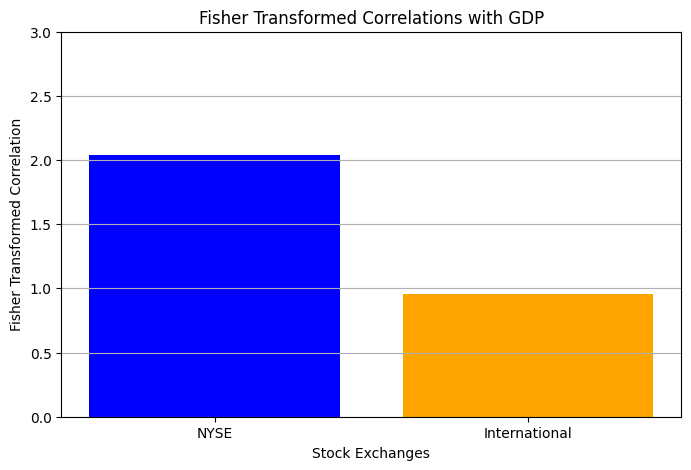

In [ ]:
# Visualize the Fisher transformed correlations
plt.figure(figsize=(8, 5))

# Bar plot for Fisher transformed correlations
plt.bar(['NYSE', 'International'], [fisher_transformed_nyse, fisher_transformed_international], color=['blue', 'orange'])

plt.title("Fisher Transformed Correlations with GDP")
plt.ylabel("Fisher Transformed Correlation")
plt.xlabel("Stock Exchanges")
plt.ylim(0, 3)
plt.grid(axis='y')

plt.show()

## ii. Hypothesis Testing (Z-test)

In [ ]:
from scipy.stats import norm

# Number of international indexes
n_international = len(international_indexes)

# Standard error for Fisher-transformed correlations (only for the international mean)
std_error = np.sqrt(1 / (n_international - 3))

# Calculate the z-score
z_score = (fisher_transformed_nyse - fisher_transformed_international) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score) # one-tailed test

# Significance level
alpha = 0.05
reject_null = p_value < alpha

(z_score, p_value, reject_null)

(2.6562872758769767, 0.003950313945433215, True)

From the z-test, we can see that the p-value is 0.0039. This number is below the alpha of 0.05, which mean we reject the null hypothesis and that our hypothesis is true, which is that the U.S Stock Exchange, in this case, the NYSE, is more sensitive to the U.S GDP than other stock exchanges outside of the U.S.

# 7. HYPOTHESIS #2

## HYPOTHESIS: Stock exchanges in developed countries show a stronger correlation  or are more sensitive to the U.S. GDP compared to those in developing countries

Null Hypothesis (H0): Stock exchanges in developed countries have no effect or non-significant correlation with U.S. GDP compared to those in developing countries
Alternative Hypothesis (H1): Stock exchanges in developed countries show a stronger correlation or more sensitive with the U.S. GDP compared to those in developing countries

In [ ]:
# Calculate the mean correlation of international stock exchanges with GDP
developed_indexes = ['NYSE', 'Tokyo Stock Exchange', 'Euronext 100', 'Toronto Stock Exchange','Korea Exchange']

developing_indexes = ['Shanghai Stock Exchange', 'NSE of India', 'Saudi Stock Exchange', 'Johannesburg Stock Exchange', 'Brazil Stock Exchange']

mean_developed = correlation_subset.loc[developed_indexes, 'GDP'].mean()
mean_developing = correlation_subset.loc[developing_indexes, 'GDP'].mean()

mean_developed, mean_developing

(0.7917581643712204, 0.7383784129193944)

In [ ]:
# Fisher transformation function
def fisher_transformation(correlation):
    return 0.5 * np.log((1 + correlation) / (1 - correlation))

# Apply Fisher transformation to the correlations
fisher_transformed_developed = fisher_transformation(mean_developed)
fisher_transformed_developing = fisher_transformation(mean_developing)

fisher_transformed_developed, fisher_transformed_developing

(1.07612627794768, 0.9469044377392606)

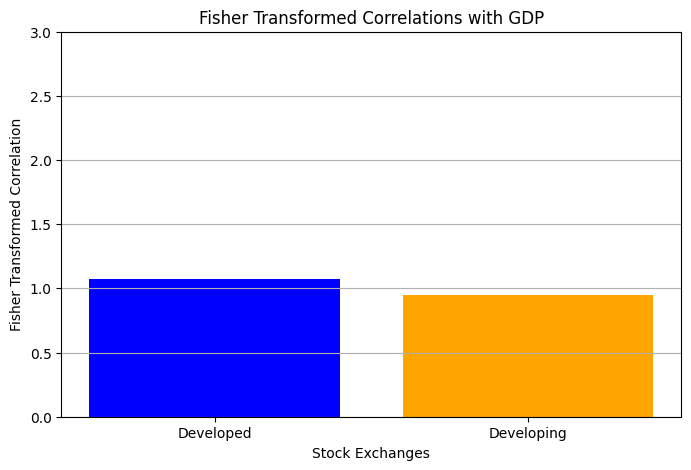

In [ ]:
# Visualize the Fisher transformed correlations
plt.figure(figsize=(8, 5))

# Bar plot for Fisher transformed correlations
plt.bar(['Developed', 'Developing'], [fisher_transformed_developed, fisher_transformed_developing], color=['blue', 'orange'])

plt.title("Fisher Transformed Correlations with GDP")
plt.ylabel("Fisher Transformed Correlation")
plt.xlabel("Stock Exchanges")
plt.ylim(0, 3)
plt.grid(axis='y')

plt.show()

## ii. Hypothesis Testing (Z-test)

In [ ]:
from scipy.stats import norm

n_developed = len(developed_indexes)
n_developing = len(developing_indexes)

std_error = np.sqrt(1 / (n_developed - 3) + 1 / (n_developing - 3))

# Calculate the z-score
z_score = (fisher_transformed_developed - fisher_transformed_developing) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score)

# Significance level
alpha = 0.05
reject_null = p_value < alpha

(z_score, p_value, reject_null)

(0.12922184020841931, 0.4485910575536193, False)

# HYPOTHESIS #3

## HYPOTHESIS: The NYSE (U.S Stock Exchange) have a stronger correlation or more sensitive to the CPI than the International exchanges

Null Hypothesis (H0): The correlation of NYSE with the CPI is not stronger or the same with the International exchanges with the US GDP. Alternative Hypothesis (H1): The NYSE have stronger correlation with the US CPI than the International exchanges with the US GDP

In [ ]:
# Calculate the mean correlation of international stock exchanges with CPI
mean_international_cpi = correlation_subset.loc[international_indexes, 'CPI'].mean()

# Get the NYSE correlation with CPI
nyse_cpi_correlation = correlation_subset.loc['NYSE', 'CPI']

mean_international_cpi, nyse_cpi_correlation

(0.7304593657471852, 0.9577290460203002)

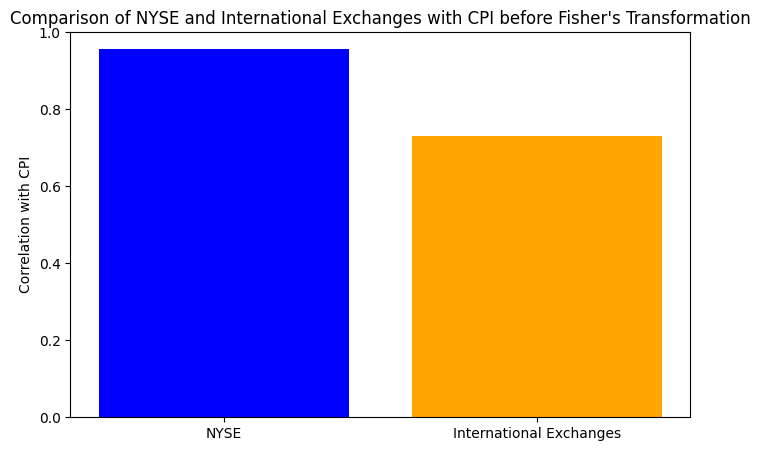

In [ ]:
plt.figure(figsize=(8, 5))

# Bar plot for NYSE and International mean correlation with CPI
plt.bar(['NYSE', 'International Exchanges'], [nyse_cpi_correlation, mean_international_cpi], color=['blue', 'orange'])

plt.ylabel('Correlation with CPI')
plt.title("Comparison of NYSE and International Exchanges with CPI before Fisher's Transformation")
plt.ylim(0, 1)
plt.show()

In [ ]:
# Apply Fisher transformation to the correlations
fisher_transformed_nyse_cpi = fisher_transformation(nyse_cpi_correlation)
fisher_transformed_international_cpi = fisher_transformation(mean_international_cpi)

fisher_transformed_nyse_cpi, fisher_transformed_international_cpi

(1.917720123719647, 0.9297115130735326)

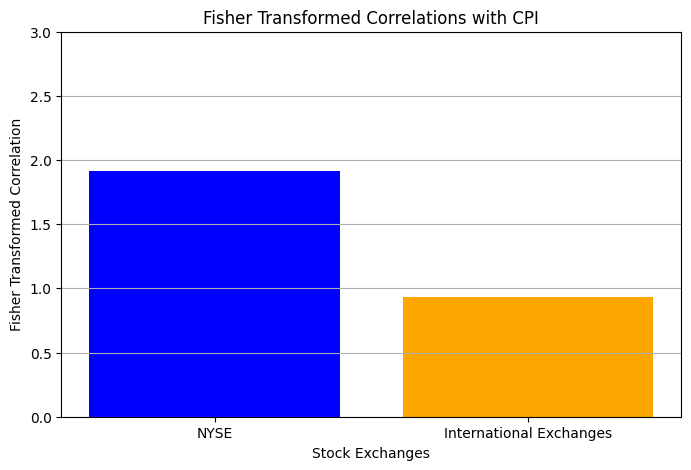

In [ ]:
plt.figure(figsize=(8, 5))

# Bar plot for Fisher transformed correlations
plt.bar(['NYSE', 'International Exchanges'], [fisher_transformed_nyse_cpi, fisher_transformed_international_cpi], color=['blue', 'orange'])

plt.title("Fisher Transformed Correlations with CPI")
plt.ylabel("Fisher Transformed Correlation")
plt.xlabel("Stock Exchanges")
plt.ylim(0, 3)
plt.grid(axis='y')

plt.show()

### Testing the Hypothesis with the z-test

In [ ]:
from scipy.stats import norm

# Number of international indexes
n_international = len(international_indexes)

# Standard error for Fisher-transformed correlations (only for the international mean)
std_error = np.sqrt(1 / (n_international - 3))

# Calculate the z-score using CPI Fisher's Transformation
z_score_cpi = (fisher_transformed_nyse_cpi - fisher_transformed_international_cpi) / std_error

# Calculate the p-value
p_value_cpi = 1 - norm.cdf(z_score_cpi) # one-tailed test

# Significance level
alpha = 0.05
reject_null_cpi = p_value_cpi < alpha

(z_score_cpi, p_value_cpi, reject_null_cpi)

(2.420116957559116, 0.007757757945826116, True)

From the z-test, we can conclude that our Hypothesis is true because the p-value is below the alpha of 0.05, which is 0.0077. This means the U.S  stock exchange is more sensitive to the CPI (Inflation) of the U.S than the international exchanges outside of the U.S.

# HYPOTHESIS #4

## HYPOTHESIS: Stock exchanges in developed countries show a stronger correlation  or are more sensitive to the U.S. CPI compared to those in developing countries.

In [ ]:
# Calculate the mean correlation of developed and developing stock exchanges with CPI
developed_exchanges = ['NYSE', 'Tokyo Stock Exchange', 'Euronext 100', 'Toronto Stock Exchange', 'Korea Exchange']
developing_exchanges = ['Shanghai Stock Exchange', 'NSE of India', 'Saudi Stock Exchange', 'Johannesburg Stock Exchange', 'Brazil Stock Exchange']

cpi_correlations_developed = correlation_subset.loc[developed_exchanges, 'CPI']
cpi_correlations_developing = correlation_subset.loc[developing_exchanges, 'CPI']

mean_cpi_developed = cpi_correlations_developed.mean()
mean_cpi_developing = cpi_correlations_developing.mean()

mean_cpi_developed, mean_cpi_developing

(0.7781806964429844, 0.7281919711060089)

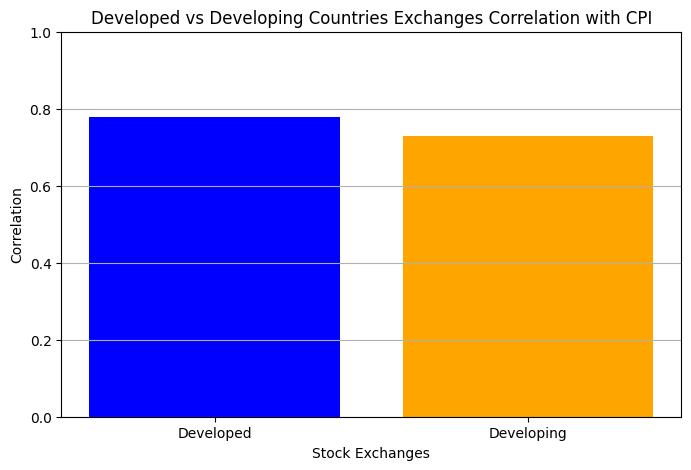

In [ ]:
plt.figure(figsize=(8, 5))

# Bar plot for mean CPI correlation
plt.bar(['Developed', 'Developing'], [mean_cpi_developed, mean_cpi_developing], color=['blue', 'orange'])

plt.title("Developed vs Developing Countries Exchanges Correlation with CPI")
plt.ylabel("Correlation")
plt.xlabel("Stock Exchanges")
plt.ylim(0, 1)
plt.grid(axis='y')

plt.show()

In [ ]:
# Apply Fisher transformation to the correlations
fisher_transformed_developed_cpi = fisher_transformation(mean_cpi_developed)
fisher_transformed_developing_cpi = fisher_transformation(mean_cpi_developing)

fisher_transformed_developed_cpi, fisher_transformed_developing_cpi

(1.0407414687300467, 0.9248674982948906)

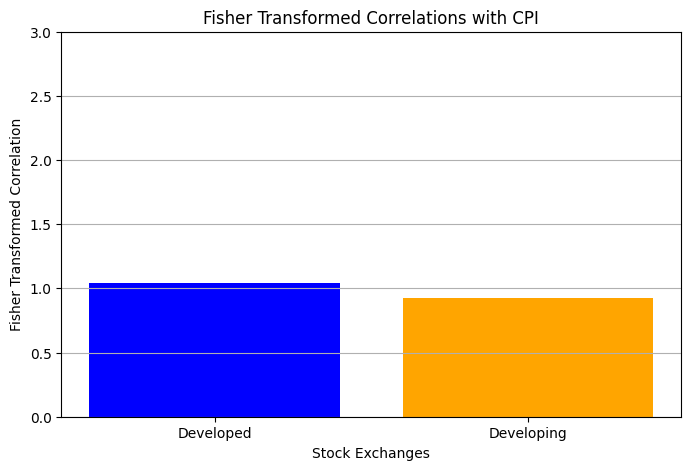

In [ ]:
plt.figure(figsize=(8, 5))

# Bar plot for Fisher transformed correlations
plt.bar(['Developed', 'Developing'], [fisher_transformed_developed_cpi, fisher_transformed_developing_cpi], color=['blue', 'orange'])

plt.title("Fisher Transformed Correlations with CPI")
plt.ylabel("Fisher Transformed Correlation")
plt.xlabel("Stock Exchanges")
plt.ylim(0, 3)
plt.grid(axis='y')

plt.show()

### Testing the Hypothesis with the z-test

In [ ]:
from scipy.stats import norm

n_developed = len(developed_exchanges)
n_developing = len(developing_exchanges)

std_error = np.sqrt(1 / (n_developed - 3) + 1 / (n_developing - 3))

# Calculate the z-score using CPI Fisher's Transformation
z_score_cpi = (fisher_transformed_developed_cpi - fisher_transformed_developing_cpi) / std_error

# Calculate the p-value
p_value_cpi = 1 - norm.cdf(z_score_cpi)

# Significance level
alpha = 0.05
reject_null_cpi = p_value_cpi < alpha

(z_score_cpi, p_value_cpi, reject_null_cpi)

(0.11587397043515613, 0.4538762126465059, False)

From the calculated p-value of 0.45 that we got, we failed to reject the null hypothesis because its value is above the alpha of 0.05. This means there is no statistically significant difference between the sensitivity of the exchange performance in developed countries and developing countries to the CPI of the U.S.

# CONCLUSION

From this analysis we can conclude that:

1. The U.S Stock Exchange is more sensitive the GDP and CPI of the U.S than the international exchanges outside of the U.S.
2. There are no stastitically significant differences between the sensitivity of the exchange performance in developed countries and developing countries to the GDP and CPI of the U.S.